In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['font.family']=['gothambook','gotham','gotham-book','serif']

# Weak lensing of surface brightness - Liouville Theorem

The lensed surface brightness $I(\pmb{\theta})$ is given as a function of the unlensed surface brightness $I^{(s)}[\pmb{\beta}]$ as:

$$
I(\pmb{\theta}) = I^{(s)}[\pmb{\beta}(\pmb{\theta})]
$$

where $\beta$ follows the lens equation (by sclating to the Einstein angle):
$$
\pmb{\beta} = \pmb{\theta} - \pmb{\alpha}(\pmb{\theta}) = \pmb{\theta}\left(1 - \frac{\theta_E ^2}{\theta^2}\right)
$$

We plot a 2d mad of unlensed and lensed surface brightness of a random distribution of source galaxies, with displacement vector after weak lensing.

In [2]:
theta_E = 5

In [3]:
L =20
xs = np.linspace(-L, L, 400)
ys = np.linspace(-L, L, 400)
X, Y = np.meshgrid(xs, ys)
n = 16
I_s = 0
I_obs = 0
x_0 = []
y_0 = []
epsilon = []


# create a uniform grid
x_edges = np.linspace( -L , L , n )
y_edges = np.linspace( -L , L , n )

xx_cents, yy_cents = np.meshgrid( ( x_edges[1:] + x_edges[:-1] ) / 2. , ( y_edges[1:] + y_edges[:-1] ) / 2.)


for i in range( len( xx_cents.flatten() )  ):
    
    phi = 0 #np.random.random()*np.pi
    a = 1#np.random.random()*0.4 
    b = 1#np.random.random()*0.4 
    epsi = 0 #(1. - np.minimum(b,a)/np.maximum(b,a))/(1. + np.minimum(b,a)/np.maximum(b,a))
    epsilon.append(epsi)
    alpha = 2
#     if i == 0:
#         Y_0 = 0.00001
#         X_0 = 0.00001
#     else:
        
    #Y_0 = np.random.random()*2*L - L
    #X_0 = np.random.random()*2*L - L
    
#     X_0 = rr[i] * np.cos( tt[i] )
#     Y_0 = rr[i] * np.sin( tt[i] ) 
    
    
    
    Y_0 = xx_cents.flatten()[i]
    X_0 = yy_cents.flatten()[i]
        
        
    x_0.append(X_0)
    y_0.append(Y_0)
    cos = X_0 /( X_0**2 + Y_0**2 )
    sin = Y_0 /( X_0**2 + Y_0**2 )

    norm = (X**2 + Y**2)**(1/2)
    
    xprime = X*(1 - theta_E**2/norm**2)
    yprime = Y*(1 - theta_E**2/norm**2)
    
    def Is(X,Y):
        
        return 10*np.exp(-alpha*((np.cos(phi)*(X-X_0) - np.sin(phi)*(Y-Y_0))**2/a**2 + (np.cos(phi)*(Y-Y_0) + np.sin(phi)*(X- X_0))**2)/b**2)
    
    I_obs = I_obs + Is(xprime,yprime)
    
    I_s = I_s + Is(X,Y)
    
# x = x_0
# y = y_0

# beta1 = np.array(x)
# beta2 = np.array(y)

# beta = np.sqrt(beta1**2 + beta2**2)
# cos = beta1/beta
# sin = beta2/beta
# Xplus = 0.5*(beta + np.sqrt(beta**2 + 4*theta_E**2))

# x_1 = cos*Xplus
# y_1 = sin*Xplus

(-20.0, 20.0, -20.0, 20.0)

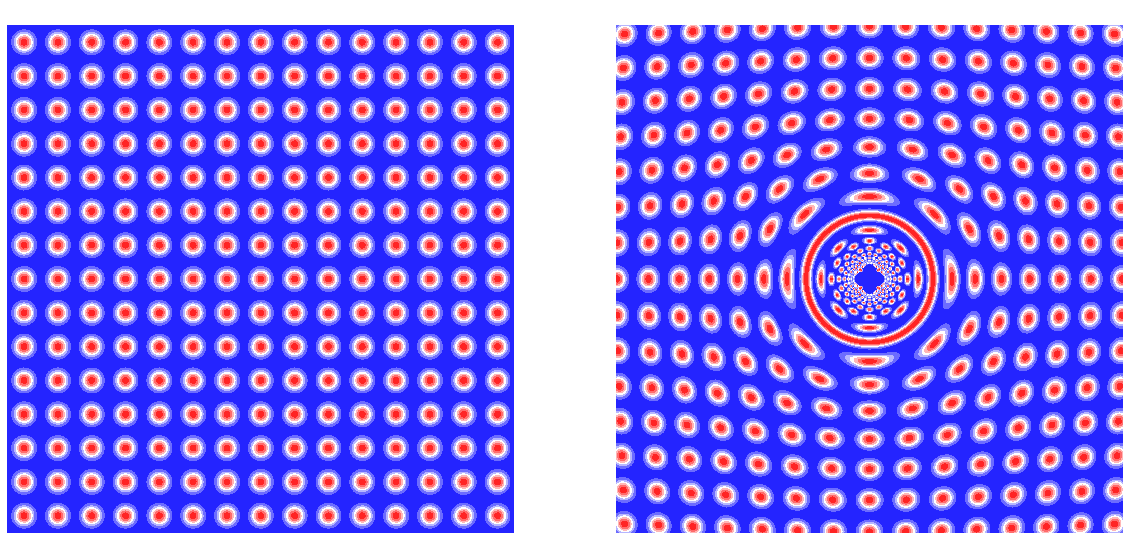

In [11]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
# u = np.linspace(0,1,100)
# x_circ = theta_E * np.cos(2*np.pi*u)
# y_circ = theta_E * np.sin(2*np.pi*u)

# for i in range(len(x_0)):
#     x = []
#     y = []
#     x.append(x_0[i])
#     x.append(x_1[i])
#     y.append(y_0[i])
#     y.append(y_1[i])
#     ax[1].plot(x,y,'-w')

# ax[0].plot(x_circ,y_circ,'--y',label='Einstein ring', linewidth = 2)
ax[0].contourf(X, Y, I_s , cmap ='bwr')
ax[0].set_xlabel(r'$\theta_1$', fontsize = 20)
ax[0].set_ylabel(r'$\theta_2$', fontsize = 20)
# ax[0].plot(0,0,'*y',label='point-mass cluster', markersize = 20)
ax[0].set_xlim(-L,L)
ax[0].set_ylim(-L,L)
ax[0].axis( 'equal')
ax[0].axis( 'off')

# ax[0].legend(fontsize=15, loc = 'upper right', numpoints=1)

# ax[1].plot(x_circ,y_circ,'--y',label='Einstein ring', linewidth = 2)
# ax[1].plot(x_1,y_1,'+r',label='lensed galaxies')
ax[1].contourf(X, Y, I_obs, cmap ='bwr')
ax[1].set_xlabel(r'$\theta_1$', fontsize = 20)
ax[1].set_ylabel(r'$\theta_2$', fontsize = 20)
# ax[1].plot(0,0,'*y',label='point-mass cluster', markersize = 20)
ax[1].set_xlim(-L,L)
ax[1].set_ylim(-L,L)
ax[1].axis( 'equal')
ax[1].axis( 'off')

# ax[1].legend(fontsize=15, loc = 'upper right', numpoints=1)



#plt.savefig('lensed.png')